In [9]:
import networkx as nx
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# 2. Stocks Selection

We select 8 stocks from 8 conglomerates based on the work from Xu et al. [<b>[2]<i>](https://aclanthology.org/P18-1183/): 

- Basic Materials: TOTAL S.A. "TOT"

- Consumer Goods: Appel Inc. "AAPL"

- Healthcare: AbbVie Inc. "ABBV"

- Services: Wall-Mart Stores Inc. "WMT"

- Utilites: Duke energy corporation "DUK"

- Financial: HSBS Holding pcl "HSBC"

- Industrial Goods: ABB Ltd. "ABB"

- Technology: China Mobile Limited "CHL"

The information comes from Sep 2012 to Sep 2017 with daily Technical information of Open, High, Low, Close, Adj Close, and Volume for the stocks price. From here, we use a **QNN** to predict the trend in the price of the stock. The results of the forecasting are stored in **stocks_forecasting**

In [39]:
stocks_name = ["AAPL","ABB", "ABBV","CHL", "DUK", "HSBC", "TOT", "WMT"]
n_stocks = len(stocks_name)
stocks_forecasting = {}
stocks_real = {}
kappa = {}
period_of_test = 90 # Days known the real price but not used during training
for name in stocks_name:
    stocks_real[name] = np.array(pd.read_csv(f"./Data/Stocks/{name}.csv")["Close"])[:1100]

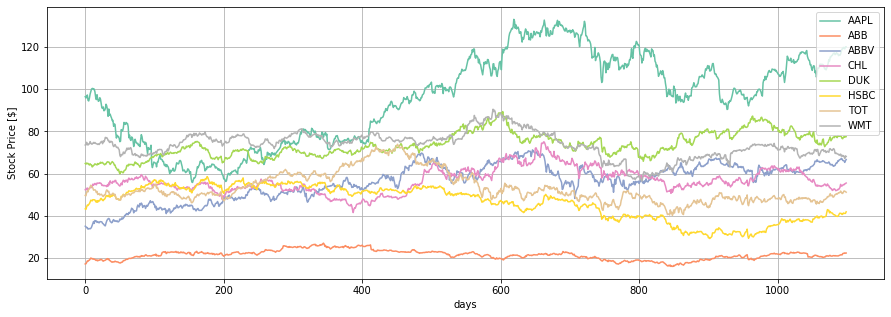

In [40]:
colors = plt.cm.get_cmap("Set2", n_stocks)
plt.figure(figsize=(15,5))
for i, name in enumerate(stocks_name):
    plt.plot(stocks_real[name], color=colors(i), label=stocks_name[i])
plt.xlabel("days")
plt.ylabel("Stock Price [$]")
plt.legend()
plt.grid()
plt.savefig("./Images/Stocks.png")

In [30]:
holding_period = 30 # Days of keeping the assets
data = [stocks_real[name] for name in stocks_name]
# sigma = cov_matrix(stocks_real, holding_period) # Covariance matrix
min_t = min([len(d) for d in data])
num_assets = len(data)
mu = []
for asset in range(num_assets):
    mu.append([data[asset][t+1]/data[asset][t] - 1 if data[asset][t] != 0 else 1 for t in range(min_t-1)])
mu = np.array(mu)
split =  min_t // holding_period
covariance_matrix =  np.array([np.cov(mu[:,i*holding_period:(i+1)*holding_period], rowvar=True) for i in range(split)])


Text(0.5, 1.0, 'Covariance Matrix between stocks')

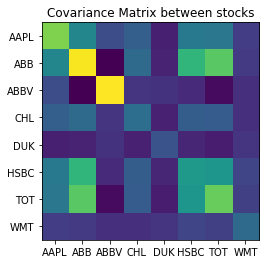

In [37]:
plt.figure()
plt.imshow(covariance_matrix[0])
plt.xticks(range(n_stocks), stocks_name)
plt.yticks(range(n_stocks), stocks_name)
plt.title("Covariance Matrix between stocks")

In [55]:
threshold = 1e-05
connections = covariance_matrix[0] > threshold

In [56]:
G = nx.Graph()
G.add_nodes_from(range(n_stocks))
for i in range(n_stocks-1):
    for j in range(i+1, n_stocks):
        if connections[i,j]:
            G.add_edge(i,j)

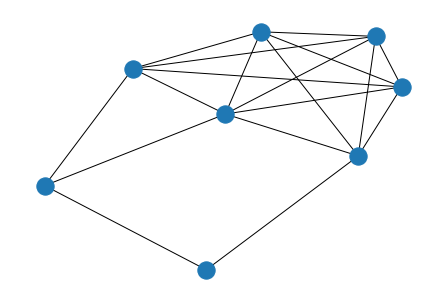

In [57]:
nx.draw(G)

In [58]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (1, 3), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (5, 6), (5, 7), (6, 7)])